In [1]:
import pydynverse as pdv

logger = pdv.logger
logger.setLevel("DEBUG")

pdv.settings.backend = "container"


  _____       _____                                     
 |  __ \     |  __ \                                    
 | |__) |   _| |  | |_   _ _ ____   _____ _ __ ___  ___ 
 |  ___/ | | | |  | | | | | '_ \ \ / / _ \ '__/ __|/ _ \
 | |   | |_| | |__| | |_| | | | \ V /  __/ |  \__ \  __/
 |_|    \__, |_____/ \__, |_| |_|\_/ \___|_|  |___/\___|
         __/ |        __/ |                             
        |___/        |___/         



In [2]:
# 1. 准备数据(wrap)
dataset = pdv.data.load_simulation_data(data_filename="real/silver/fibroblast-reprogramming_treutlein.rds")
dataset

{'id': 'real/silver/fibroblast-reprogramming_treutlein',
 'cell_ids': ['1_iN1_C01',
  '1_iN1_C02',
  '1_iN1_C03',
  '1_iN1_C04',
  '1_iN1_C05',
  '1_iN1_C07',
  '1_iN1_C08',
  '1_iN1_C09',
  '1_iN1_C10',
  '1_iN1_C11',
  '1_iN1_C12',
  '1_iN1_C13',
  '1_iN1_C14',
  '1_iN1_C15',
  '1_iN1_C16',
  '1_iN1_C17',
  '1_iN1_C19',
  '1_iN1_C20',
  '1_iN1_C21',
  '1_iN1_C22',
  '1_iN1_C23',
  '1_iN1_C25',
  '1_iN1_C26',
  '1_iN1_C27',
  '1_iN1_C29',
  '1_iN1_C30',
  '1_iN1_C31',
  '1_iN1_C33',
  '1_iN1_C34',
  '1_iN1_C35',
  '1_iN1_C36',
  '1_iN1_C37',
  '1_iN1_C38',
  '1_iN1_C40',
  '1_iN1_C41',
  '1_iN1_C42',
  '1_iN1_C43',
  '1_iN1_C44',
  '1_iN1_C46',
  '1_iN1_C47',
  '1_iN1_C48',
  '1_iN1_C49',
  '1_iN1_C51',
  '1_iN1_C52',
  '1_iN1_C53',
  '1_iN1_C54',
  '1_iN1_C55',
  '1_iN1_C56',
  '1_iN1_C57',
  '1_iN1_C58',
  '1_iN1_C60',
  '1_iN1_C61',
  '1_iN1_C62',
  '1_iN1_C64',
  '1_iN1_C66',
  '1_iN1_C67',
  '1_iN1_C68',
  '1_iN1_C69',
  '1_iN1_C70',
  '1_iN1_C71',
  '1_iN1_C72',
  '1_iN1_C73',
 

In [3]:
# 2. 选择方法(method)
methods_selected = pdv.methods.ti_paga(resolution=0.5)
logger.info(f"Methods {methods_selected} selecting finished")

[2025年01月12日 12时43分47秒] INFO     backend: container                                                          
                        DEBUG    Docker image(dynverse/ti_paga:v0.9.9.05) loaded                                   
                        INFO     Methods {'method': {'id': 'paga', 'name': 'PAGA', 'tool_id': 'paga', 'source':    
                                 'tool', 'platform': 'Python', 'url':                                              
                                 'https://github.com/theislab/graph_abstraction', 'authors': [{'given':            
                                 'Alexander', 'family': 'Wolf', 'email': 'alex.wolf@helmholtz-muenchen.de',        
                                 'github': 'falexwolf', 'ORCID': '0000-0002-8760-7838'}, {'given': 'Fabian',       
                                 'family': 'Theis', 'email': 'fabian.theis@helmholtz-muenchen.de', 'github':       
                                 'theislab'}]}, 'wrapper': {'type': 'branch_tr

In [4]:
# 3. 运行方法(wrap)
cluster_list = list(dataset["grouping"])
dataset = pdv.wrap.add_prior_information(dataset, start_id="1_iN1_C01", groups_id=cluster_list) # 添加先验知识
model = pdv.wrap.infer_trajectory(dataset, methods_selected, parameters={"resolution": 1}) # 此处尝试修改参数
logger.info(f"Methods executing finished, model: {model}")

                        DEBUG    Temp wd: /tmp/tmpo_b76ejt                                                         
                        DEBUG    Save json successfully, path: /tmp/tmpo_b76ejt/input.json                         
                        DEBUG    h52json script:                                                                   
                                 /home/huang/PyCode/scRNA/PyDynverse/PyDynverse/pydynverse/util/../rscript/docker_i
                                 nput_json2h5.R                                                                    
[2025年01月12日 12时43分49秒] DEBUG    CompletedProcess(args=['/home/huang/PyCode/scRNA/PyDynverse/PyDynverse/pydyn
                                       verse/util/../rscript/docker_input_json2h5.R', '--input_json_filename',     
                                       '/tmp/tmpo_b76ejt/input.json', '--input_h5_filename',                       
                                       '/tmp/tmpo_b76ejt/input.h5'], returncod

                        INFO     Coloring by grouping                                                              
                        WARNING  The number of colors(7) is greater than the number of colors in the 'Set3'        
                                 palette(12), and the 'husl' palette selection is used.                            
                        DEBUG    selecting waypoints                                                               
                        DEBUG    selecting waypoints shape is (128, 355), finished!                                
                        INFO     Result plotting finished                                                          


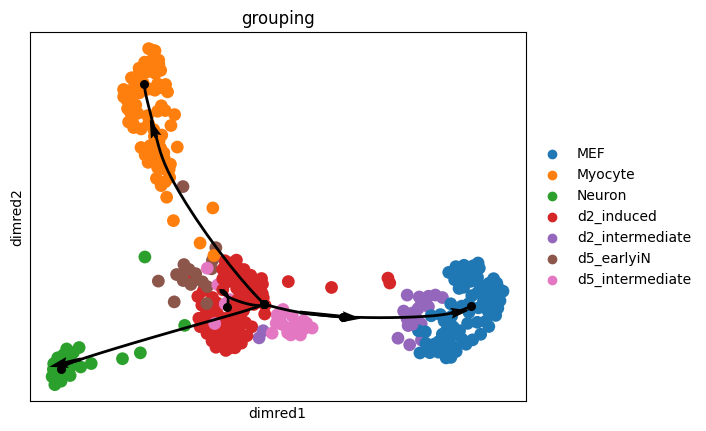

In [5]:
# 4. 绘制轨迹(dimred+plot)
pdv.plot.plot_dimred(model, expression_source=dataset["expression"], grouping=cluster_list)
logger.info("Result plotting finished")